# 0.0. Importações

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## 0.1. Extração dos Dados

In [5]:
df_raw = pd.read_csv('dataset/insurance.csv')

# 1.0. Entendendo os Dados

In [6]:
df1 = df_raw.copy()

In [7]:
# verifica as cinco primeiras linhas
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 1.1. Dimensões do dataset (linhas x colunas)

In [8]:
print(f'O dataset tem {df1.shape[0]} linhas e {df1.shape[1]} colunas.')

O dataset tem 1338 linhas e 7 colunas.


O dataset contém 7 colunas, sendo elas:
- age : Idade do cliente
- sex : O sexo do cliente
- bmi : IMC do cliente
- children : Quantidade de dependentes
- smoker : variável que informa se o cliente é fumante ou não
- region : região em que o cliente mora
- charges : Valor anual pago pelo cliente (em dólares americanos)

## 1.2. Tipos de dados

In [9]:
df1.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## 1.3. Verifica se há valores faltantes

In [10]:
df1.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## 1.4. Estatística Descritiva

In [11]:
num_attributes = df1.select_dtypes(include=['int', 'float'])
cat_attributes = df1.select_dtypes(include=['object'])

### 1.4.1. Atributos Numéricos

In [17]:
# Tendencia Central - Media, mediana
# Dispercao - std, min, max, range, skew, kurtosis

num_statistics = pd.DataFrame({'min': num_attributes.min(),
                               'max': num_attributes.max(),
                               'media': num_attributes.mean(),
                               'mediana': num_attributes.median(),
                               'desvio_padrao': num_attributes.std(),
                               'amplitude': num_attributes.max() - num_attributes.min(),
                               'skewness' : num_attributes.skew(),
                               'curtose' : num_attributes.kurtosis()})

num_statistics

,min,max,media,mediana,desvio_padrao,amplitude,skewness(assimetria),curtose
age,18.0000,64.00000,39.207025,39.000,14.049960,46.00000,0.055673,-1.245088
bmi,15.9600,53.13000,30.663397,30.400,6.098187,37.17000,0.284047,-0.050732
children,0.0000,5.00000,1.094918,1.000,1.205493,5.00000,0.938380,0.202454
charges,1121.8739,63770.42801,13270.422265,9382.033,12110.011237,62648.55411,1.515880,1.606299


## 1.4.2. Atributos Categóricos

In [22]:
# numero de valores unicos para cada variavel
cat_attributes.apply(lambda x: x.nunique(), axis=0)

sex       2
smoker    2
region    4
dtype: int64

In [40]:
#cria o dashboard com 3 colunas e 1 linha
fig = make_subplots(rows= 1, cols= 3)

#cria graficos boxplot
for i, col in enumerate(cat_attributes.columns):
    fig.add_trace(go.Box(x = df1[col],
                         y = df1['charges'],
                         name= col), row=1, col=i+1)
    
# Atualiza o layout do dashboard
fig.update_layout(height=600, width=900, 
                  title_text="Dados Categóricos x Valor Pago Pelo Cliente", 
                  title=dict(x=0.5))

# Exibe o dashboard
fig.show()

# 2.0. Análise Exploratória Dos Dados

In [41]:
df2 = df1.copy()

## 2.1. Análise Univariada

### Variáveis Numéricas

In [107]:
#cria o dashboard

# Define o número de colunas do dashboard
num_cols = 2

# Calcula o número de linhas necessárias
num_rows = len(num_attributes.columns) // num_cols + (len(num_attributes.columns) % num_cols > 0)

fig = make_subplots(rows= num_rows, cols= num_cols)

for i, column in enumerate(num_attributes.columns):
    row = i // num_cols + 1
    col = i % num_cols + 1
    
    fig.add_trace(go.Histogram(x=num_attributes[column], name = column), row= row, col=col)

# Atualiza o layout do dashboard
fig.update_layout(height=400*num_rows, width=900, title_text="Distribuição das Variáveis Numéricas", bargap=0.4, title = dict(x=0.5))


# Exibe o dashboard
fig.show()

### Variáveis Categóricas

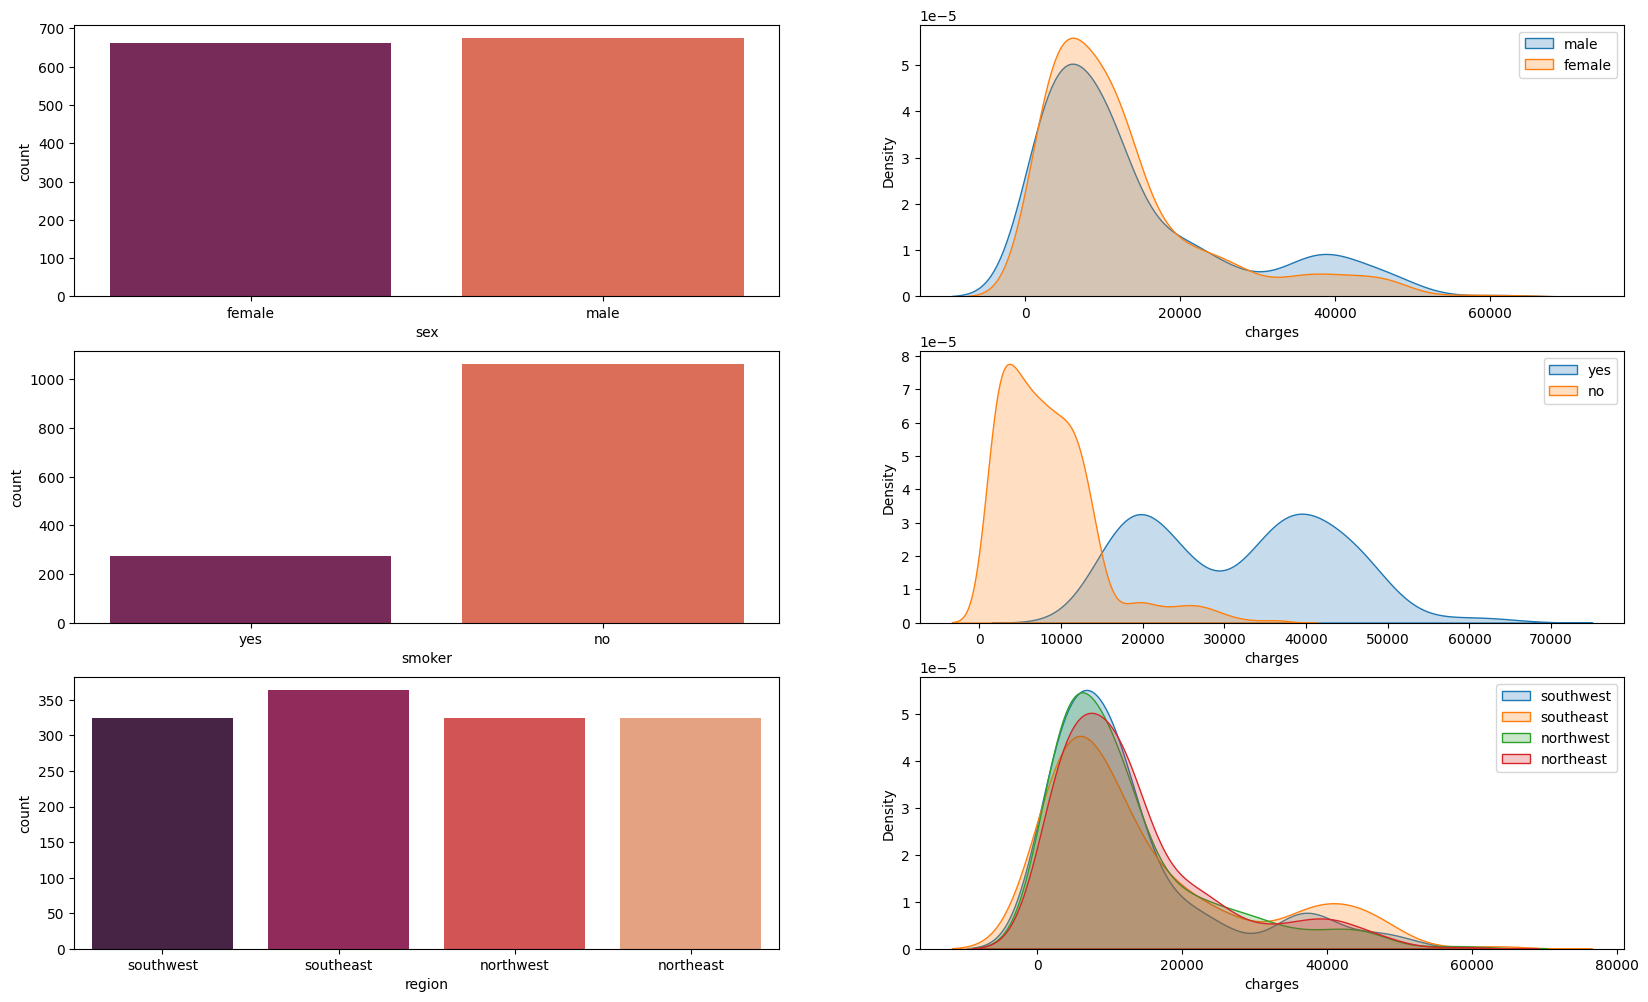

In [144]:
plt.figure(figsize=(20,12))

#sex
plt.subplot(3,2,1)
sns.countplot(data= df2, x = 'sex', palette='rocket')

plt.subplot(3,2,2)
sns.kdeplot(data=df2[df2['sex'] == 'male']['charges'], 
            fill=True,
            label='male')

sns.kdeplot(data=df2[df2['sex'] == 'female']['charges'], 
            fill=True,
            label='female')

plt.legend()

#smoker
plt.subplot(3,2,3)
sns.countplot(data= df2, x = 'smoker', palette='rocket')

plt.subplot(3,2,4)
sns.kdeplot(data=df2[df2['smoker'] == 'yes']['charges'], 
            fill=True,
            label='yes')

sns.kdeplot(data=df2[df2['smoker'] == 'no']['charges'], 
            fill=True,
            label='no')

plt.legend()

#region
plt.subplot(3,2,5)
sns.countplot(data= df2, x = 'region', palette='rocket')

plt.subplot(3,2,6)
sns.kdeplot(data=df2[df2['region'] == 'southwest']['charges'], 
            fill=True,
            label='southwest')

sns.kdeplot(data=df2[df2['region'] == 'southeast']['charges'], 
            fill=True,
            label='southeast')

sns.kdeplot(data=df2[df2['region'] == 'northwest']['charges'], 
            fill=True,
            label='northwest')

sns.kdeplot(data=df2[df2['region'] == 'northeast']['charges'], 
            fill=True,
            label='northeast')

plt.legend();